# Weather Api

The weather Api is a python script used to retrieve weather data across the world for one day.

In [1]:
#import dependencies
import pandas as pd
import json
import requests as req
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import datetime
import seaborn as sns


In [2]:
#enter the api key
api_key = "0b64dd1f2c2190bbed796f9a0d13d58b"
#url for the api 
url = "http://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=metric&q="
city_details=pd.DataFrame()
city_details["Latitude"]=[np.random.uniform(-90,90) for x in range(1000)]
city_details["Longitude"]=[np.random.uniform(-180, 180) for x in range(1000)]
city_details["City"]=""
city_details["Country"]=""
city_details["Cloudiness"]=""
city_details["Date"]=""
city_details["Humidity"]=""
city_details["Max Temp"]=""
city_details["Wind Speed"]=""

In [3]:
print("Begin Retrieving City details....")
#retrieve the city details from citypy
for index,row in city_details.iterrows():
    try:
        lat=row["Latitude"]
        lon=row["Longitude"]
        #retrieves nearest city based on latitude and longitude
        city=citipy.nearest_city(lat, lon).city_name
        #retrieves nearest city based on latitude and longitude
        country=citipy.nearest_city(lat, lon).country_code
        #check whether the city and country code is present in the dataframe
        if country+city not in city_details.Country.values+city_details.City.values: 
            city_details.set_value(index,"City",city)
            city_details.set_value(index,"Country",country)
            print("Retrieving City %s" % city)
            
    except:
        print("Skipping")
#retrive only rows with values
city_details=city_details.loc[city_details["City"]!=""]
city_details=city_details.reset_index(drop=True)
print("End Retreiving City Details")


Begin Retrieving City details....
Retrieving City norman wells
Retrieving City busselton
Retrieving City kirakira
Retrieving City chokurdakh
Retrieving City saleaula
Retrieving City marsa matruh
Retrieving City nizhneyansk
Retrieving City rikitea
Retrieving City hermanus
Retrieving City esperance
Retrieving City hithadhoo
Retrieving City bluff
Retrieving City punta arenas
Retrieving City alice springs
Retrieving City ushuaia
Retrieving City cape town
Retrieving City osmena
Retrieving City tuatapere
Retrieving City batagay
Retrieving City turan
Retrieving City shingu
Retrieving City port blair
Retrieving City tefe
Retrieving City salamanca
Retrieving City saint-philippe
Retrieving City severo-kurilsk
Retrieving City vaini
Retrieving City jamestown
Retrieving City vila franca do campo
Retrieving City luganville
Retrieving City new norfolk
Retrieving City butaritari
Retrieving City clyde river
Retrieving City puerto ayora
Retrieving City bengkulu
Retrieving City amahai
Retrieving City mat

In [4]:
print("Begin Retrieving City details....")
#retrieve weather of each city from openweather API
for index,row in city_details.iterrows():
    #create the target url in the require format
    target_url=url+row["City"]+","+row["Country"]
    
    i=0
    #get the reponse from api call
    response=req.get(target_url).json()
    
    try:
        print("Retrieving City Weather %s" % row["City"])
        #get all weather details
        city_details.set_value(index,"Cloudiness",response["clouds"]["all"])
        city_details.set_value(index,"Date",datetime.datetime.fromtimestamp(int(response["dt"])).strftime('%Y-%m-%d %H:%M:%S'))
        city_details.set_value(index,"Humidity",response["main"]["humidity"])
        city_details.set_value(index,"Max Temp",response["main"]["temp_max"])
        city_details.set_value(index,"Wind Speed",response["wind"]["speed"])
    except:
        print("Skip",i)
        i+=1
print("End Retreiving City Details")        

Begin Retrieving City details....
Retrieving City Weather norman wells
Retrieving City Weather busselton
Retrieving City Weather kirakira
Retrieving City Weather chokurdakh
Retrieving City Weather saleaula
Skip 0
Retrieving City Weather marsa matruh
Retrieving City Weather nizhneyansk
Skip 0
Retrieving City Weather rikitea
Retrieving City Weather hermanus
Retrieving City Weather esperance
Retrieving City Weather hithadhoo
Retrieving City Weather bluff
Retrieving City Weather punta arenas
Retrieving City Weather alice springs
Retrieving City Weather ushuaia
Retrieving City Weather cape town
Retrieving City Weather osmena
Retrieving City Weather tuatapere
Retrieving City Weather batagay
Retrieving City Weather turan
Retrieving City Weather shingu
Retrieving City Weather port blair
Retrieving City Weather tefe
Retrieving City Weather salamanca
Retrieving City Weather saint-philippe
Retrieving City Weather severo-kurilsk
Retrieving City Weather vaini
Retrieving City Weather jamestown
Retri

Retrieving City Weather tessalit
Retrieving City Weather taoudenni
Retrieving City Weather cabo san lucas
Retrieving City Weather koslan
Retrieving City Weather codrington
Skip 0
Retrieving City Weather hasaki
Retrieving City Weather carnarvon
Retrieving City Weather clonakilty
Retrieving City Weather dunedin
Retrieving City Weather porto santo
Retrieving City Weather ladario
Retrieving City Weather jalpan
Retrieving City Weather povenets
Retrieving City Weather penzance
Retrieving City Weather koumac
Retrieving City Weather agadez
Retrieving City Weather lorengau
Retrieving City Weather byron bay
Retrieving City Weather ushtobe
Retrieving City Weather honningsvag
Retrieving City Weather kaka
Retrieving City Weather port moresby
Retrieving City Weather necochea
Retrieving City Weather nouadhibou
Retrieving City Weather turkistan
Skip 0
Retrieving City Weather deputatskiy
Retrieving City Weather weston
Retrieving City Weather porto novo
Retrieving City Weather harnosand
Retrieving City 

In [5]:
#retrieve only rows with data
city_details=city_details.loc[city_details["Date"]!=""]
city_details=city_details.reset_index(drop=True)
city_details.head()


,Latitude,Longitude,City,Country,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,68.017386,-120.158531,norman wells,ca,75,2017-12-26 18:00:00,67,-31,1.5
1,-43.041397,95.656818,busselton,au,12,2017-12-26 18:53:15,100,18.35,5.07
2,-13.001098,160.231590,kirakira,sb,0,2017-12-26 18:53:15,100,28.68,2.82
3,69.390603,149.573567,chokurdakh,ru,0,2017-12-26 18:53:16,47,-26.5,4.87
4,27.348648,26.095277,marsa matruh,eg,0,2017-12-26 18:00:00,76,14,4.1


In [6]:
#create list to contain the Y-axis values of the Plots
plot_list=["Max Temp","Humidity","Cloudiness","Wind Speed"]
labels={"Max Temp":"Maximum Temprateure (F)",
       "Humidity":"Humidity %",
       "Cloudiness":"Cloudiness %",
       "Wind Speed":"Wind Speed (m/s)"}



In [7]:
#use the function to plot the Scatter plot and set values
def plot_graph_details(y):
    date_rep=city_details["Date"].max().split(" ")[0]
    sns.set_style('ticks')
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(20,10))
    plt.rc('font', size=16,weight="bold")
    p = sns.regplot(x="Latitude", y=y, data=city_details, fit_reg=False).set_title('%s by Latitude(%s)'% (y,date_rep))
     
    plt.ylabel(labels[y])
    plt.xlim(-100,100)
    # Save the figure
    plt.savefig('%s by Latitude(%s)'% (y,date_rep)+"png")
    return plt
 

## Maximum Temprature by Latitude

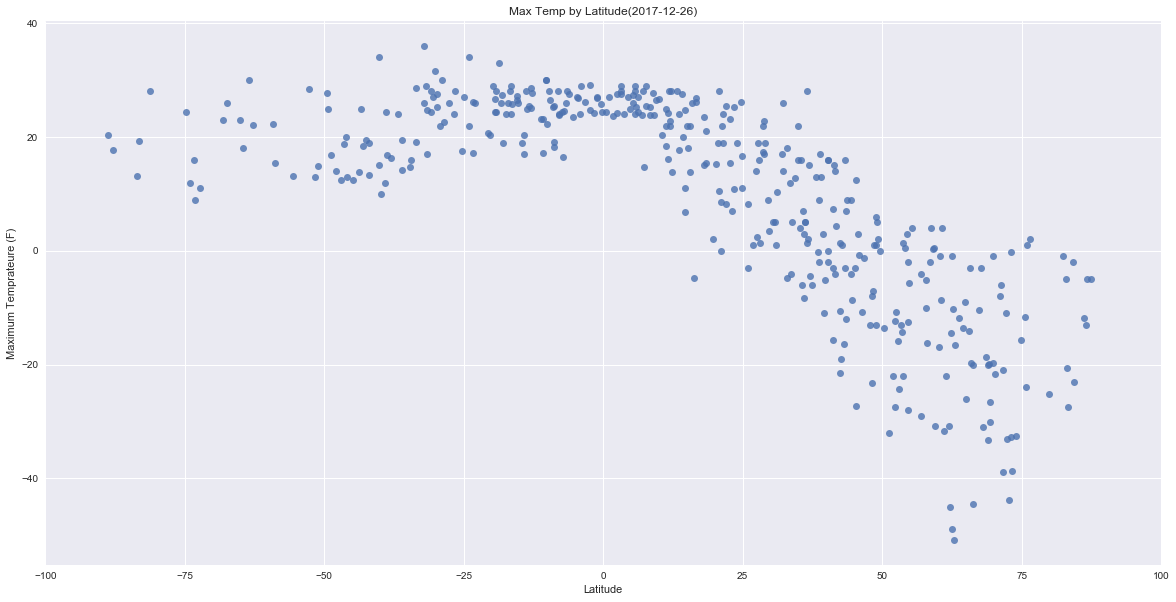

In [8]:
plt=plot_graph_details("Max Temp")
plt.show()

### Observation:
<ol>
    <li> The Scatter plot Max Temp by latitude represent how Maximum temprature varies according to the latitude.
    <li> The temprature is highest at latitude 0; which is Equator
    <li> The temprature is lowest in the south pole(75 to 90)
</ol>

## Humidity by Latitude

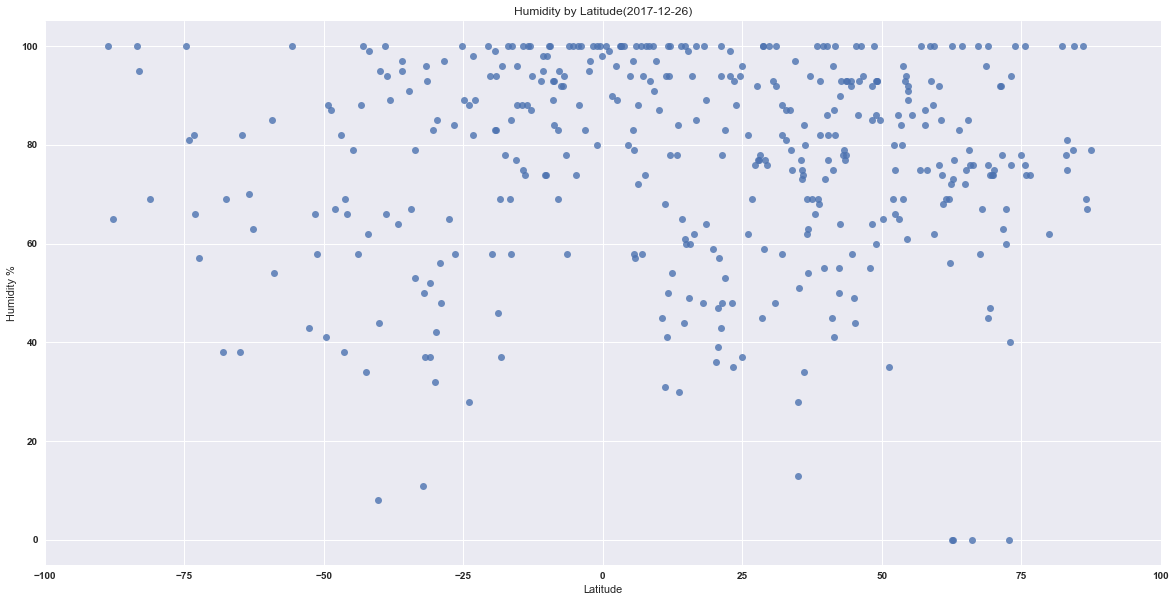

In [9]:
plt=plot_graph_details("Humidity")
plt.show()

### Observation:
<ol>
    <li> Humidity  is lesser in the north pole, since its colder and humidity is less
    <li> Around the Equator, the humidity values are clustered, indicating higher humidity as we go down to South Pole
   

## Cloudiness by Latitude

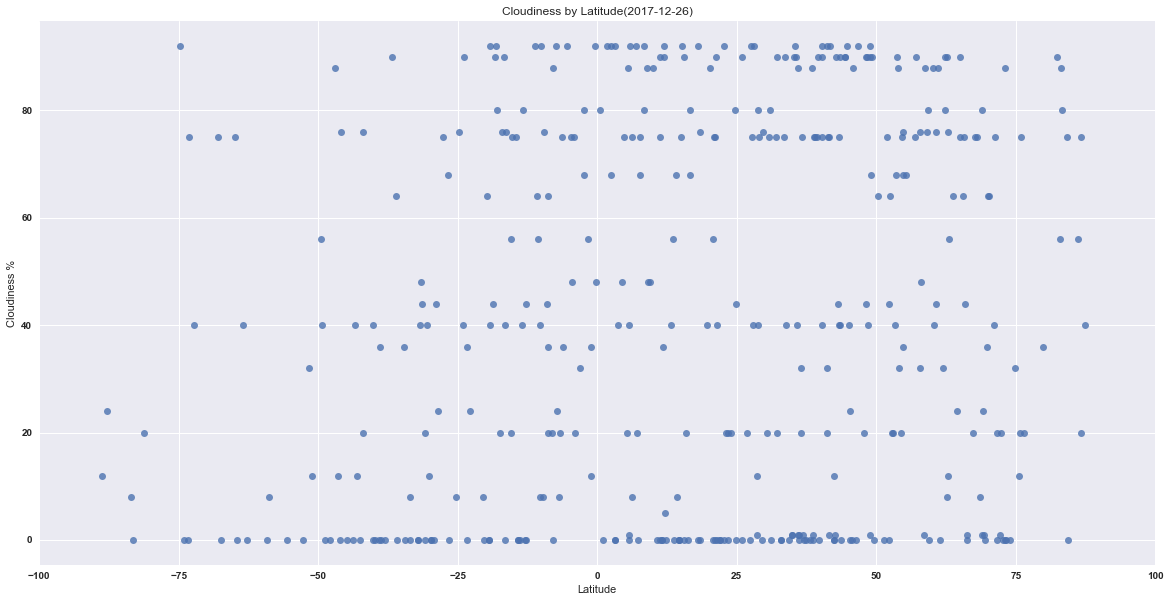

In [10]:
plt=plot_graph_details("Cloudiness")
plt.show()

### Observation:
<ol>
    <li> Cloudiness is more  in areas near Equator.
    <li> Cloudiness is less in regions around North Pole 

## Wind Speed by Latitude

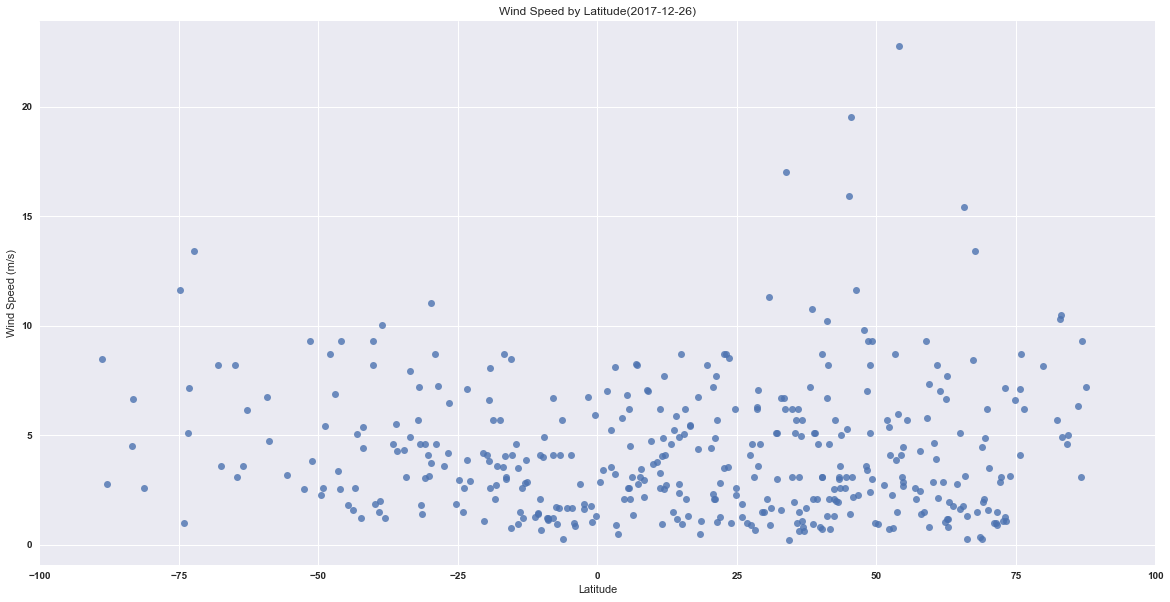

In [11]:
plt=plot_graph_details("Wind Speed")
plt.show()

### Observation:
<ol>
    <li> Wind Speed is below 10 m/s in most of the areas near the Equator
    <li> In the poles, Wind Speed in varying, at -50 latitude there is a 14 m/s wind speed.
    <li> Wind Speed is highest between Equator and 25, which can be seen as outlier
</ol>